In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1
Generate two gaussian distributions with mean of 10 and -10, stddev = 5 and size =1000
Add both of the distributions and plot a histogram
Estimate mean and variance

The estimated mean of the sum of the two generated gaussian distribution is 0.013391783296487575
The estivated variance of the sum of the two generated gaussian distribution is 51.96203602523229


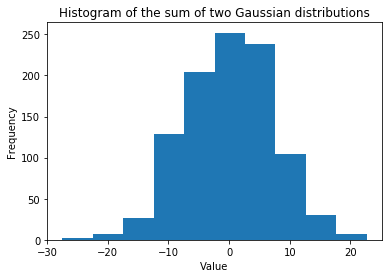

In [23]:
%matplotlib inline

# Generating two gaussian distributions using numpy function
distribution_1 = np.random.normal(loc = -10 , scale = 5 , size = 1000)
distribution_2 = np.random.normal(loc = 10, scale = 5, size =1000)

# Calculating sum of the entries from both the distributions
sum_dist = distribution_1 + distribution_2

#calculating mean using numpy function mean
mean = np.mean(sum_dist)

#calculating variance using numpy function var
var = np.var(sum_dist)
print("The estimated mean of the sum of the two generated gaussian distribution is {}".format(mean))
print("The estivated variance of the sum of the two generated gaussian distribution is {}".format(var))

#plotting histogram using matplotlib of the distribution generated by adding two gaussian distributions
plt.hist(sum_dist)

#setting x and y labels
plt.xlabel("Value")
plt.ylabel("Frequency")

#setting the title of the plot
plt.title("Histogram of the sum of two Gaussian distributions")

#displaying the plot
plt.show()

# Problem 2

Let Xi be an iid Bernoulli random variable with value f-1,1g.
Look at the random variable Zn = 1/n sum Xi. By taking 1000 draws from Zn, plot its histogram.
Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n
is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also
for much bigger n: n = 250, to see that at this point, one can really see the bell curve.

In [3]:
# Function to generate samples
def getSample(n, p = 0.5):       
    draws = np.ones((n))
    for i in range(n):
        draw = np.random.uniform()
        if draw < p:
            draws[i] = -1

    return np.sum(draws)/n

# Function to generate historgram
# takes n as input for number of samples
def getHistogram(n, num_draws=1000):
    Zn = np.zeros((num_draws))
    
    for i in range(num_draws):
        Zn[i] = getSample(n)

    plt.title('Histogram of Bernoulli Sample')
    plt.xlabel('Sum of {} Bernoulli r.v.s taken {} times'.format(n, num_draws))
    plt.ylabel('Frequency')
    plt.hist(Zn, bins = n)
    plt.show()

'''
class Bernoulli:
    def __init__(self, p):
        draw = np.random.uniform()
        if draw > p:
            self.value = 1
        else:
            self.value = -1
'''

'\nclass Bernoulli:\n    def __init__(self, p):\n        draw = np.random.uniform()\n        if draw > p:\n            self.value = 1\n        else:\n            self.value = -1\n'

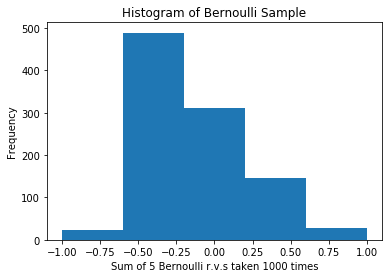

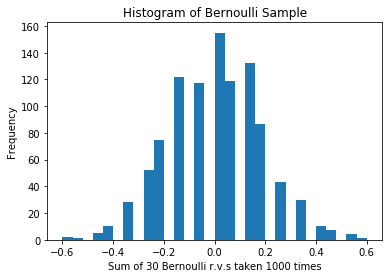

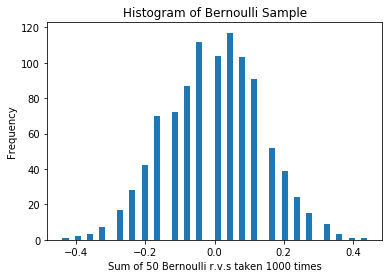

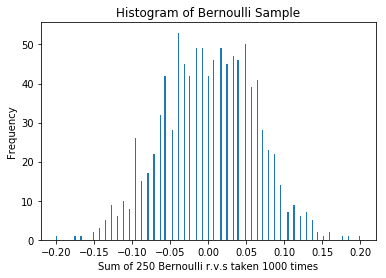

In [4]:
# Calling getHistogram function for different values of n to notice how the curve 
# changes into bell curve for large n
getHistogram(5)
getHistogram(30)
getHistogram(50)
getHistogram(250)

# Problem 3

Generate 25000 sample points from Gaussian distribution with mean =0, std dev = 5
Calculate mean and std dev without using library functions

In [5]:
# Generating the desired normal distribution with mean = 0, std dev = 5 and 25000 entries
distribution = np.random.normal(loc =0,scale=5,size = 25000)

# Calculating the mean of generated distribution by adding all the entries and dividing by the number of entries in the 
# distribution
calc_mean = np.sum(distribution)/(distribution.size)
print("Mean of sample points from Gaussian is {} ".format(calc_mean))

# Calculating the quantity (X-E[x])^2 to find variance
distribution_subtracted_mean_square = (distribution - calc_mean)*(distribution-calc_mean)

# Calculating variance by using the definition of variance as expected value of (X-E[x])^2
variance_of_distribution = np.sum(distribution_subtracted_mean_square)/distribution_subtracted_mean_square.size

# Using the fact that standard deviation is square root of variance to calculate standard deviation
std_dev = np.sqrt(variance_of_distribution)

print("Standard deviation of the samples points is {}".format(std_dev))







Mean of sample points from Gaussian is 0.05107647452877015 
Standard deviation of the samples points is 5.033393089259453


# Problem 4

Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples
of 2 dimensional data from the Gaussian distribution given.

Then, estimate the mean and covariance matrix for this multi-dimensional data using elemen-
tary numpy commands, i.e., addition, multiplication, division (do not use a command that
takes data and returns the mean or standard deviation).

In [6]:
mean = [-5,5]
covariance = [[20,0.8],[0.8,30]]

#Generating a bivariate gaussian distribution with given mean and covariance matrix
x1,x2 =np.random.multivariate_normal(mean,covariance,10000).T

#Mean of x1 and x2 are simply sum of the values divided by the size of the distribution
mean_of_x1 = (np.sum(x1)/x1.size)
mean_of_x2 = (np.sum(x2)/x2.size)

#Mean of bivariate gaussian distribution is simply the sum of individual means of x1 and x2
mean_of_bivariate_gaussian = mean_of_x1 + mean_of_x2
print("Calculated mean of generated bivariate distribution is {}".format(mean_of_bivariate_gaussian))

#Calculating the variance of x1 to be used in covariance matrix
distribution_subtracted_mean_square_of_x1 = (x1 - mean_of_x1)*(x1-mean_of_x1)
variance_of_distribution_x1 = np.sum(distribution_subtracted_mean_square_of_x1)/distribution_subtracted_mean_square_of_x1.size

#Calculating the variance of x2 to be used in covariance matrix
distribution_subtracted_mean_square_of_x2 = (x2 - mean_of_x2)*(x2-mean_of_x2)
variance_of_distribution_x2 = np.sum(distribution_subtracted_mean_square_of_x2)/distribution_subtracted_mean_square_of_x2.size

#Calculating the covariance of x1 and x2 as expected value of (x1-E[x1])*(x2-E[x2])
distribution_of_x1_and_x2_with_subtracted_mean = (x1-mean_of_x1)*(x2-mean_of_x2)
covariance_of_x1_and_x2 = np.sum(distribution_of_x1_and_x2_with_subtracted_mean)/distribution_of_x1_and_x2_with_subtracted_mean.size

#Generating covariance matrix as list of lists
covariance_matrix = []

covariance_matrix_row1 =[variance_of_distribution_x1,covariance_of_x1_and_x2]
covariance_matrix.append(covariance_matrix_row1)

covariance_matrix_row2 = [covariance_of_x1_and_x2,variance_of_distribution_x2]
covariance_matrix.append(covariance_matrix_row2)

#converting covariance matrix into data frame for better visual display
data_frame = pd.DataFrame(covariance_matrix)

#changing index from numbering to distribtution names

data_frame.rename(index={0:'x1',1:'x2'}, columns={0:'x1',1:'x2'}, inplace=True)
print("Covariance matrix of the generated bivariate gaussian distribution is displayed below")
print(data_frame)



Calculated mean of generated bivariate distribution is -0.047783869093271925
Covariance matrix of the generated bivariate gaussian distribution is displayed below
           x1         x2
x1  19.683774   0.621428
x2   0.621428  30.195189


# Problem 5
Download from Canvas/Files the dataset PatientData.csv.
Each row is a patient and the last column is the condition that the patient has. Do data
exploration using Pandas and other visualization tools to understand what you can about the
dataset.

For example:
1. How many patients and how many features are there?
2. What is the meaning of the first 4 features? See if you can understand what they mean.
3. Are there missing values? Replace them with the average of the corresponding feature column.
4. How could you test which features strongly influence the patient condition and which do not?

List what you think are the three most important features.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'PatientData.csv'
patient_data = pd.read_csv(file_path)
patient_data.columns
patient_data.values

array([[56, 1, 165, ..., 20.4, 38.8, 6],
       [54, 0, 172, ..., 12.3, 49.0, 10],
       [55, 0, 175, ..., 34.6, 61.6, 1],
       ...,
       [36, 0, 166, ..., -44.2, -33.2, 2],
       [32, 1, 155, ..., 25.0, 46.6, 1],
       [78, 1, 160, ..., 21.3, 32.8, 1]], dtype=object)

## Part 1
Calling ```patient_data.shape``` shows the patients and features. There is one less feature than the dimension along the second axis, as the final vector is used for the labels.

In [8]:
patient_data.shape
# 451 patients
# 279 features

(451, 280)

## Part 2
Here we pull the first four columns of our data set, and plot them.

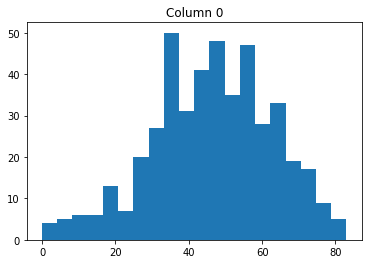

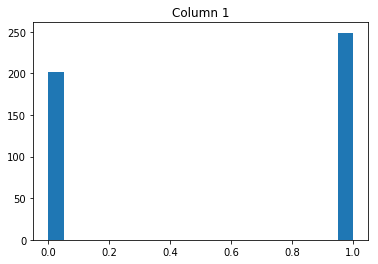

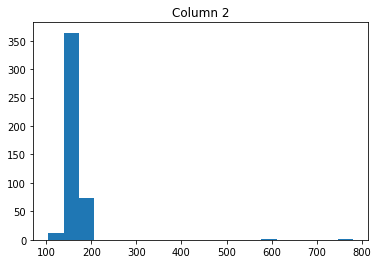

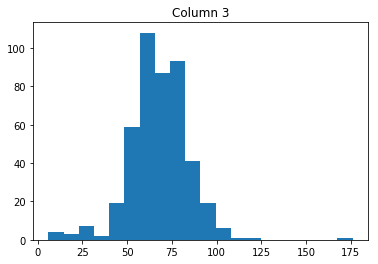

In [9]:
first_four = []
i = 0
for i in range(4):
    first_four.append(patient_data.iloc[:,i])

for i in range(4):
    plt.hist(first_four[i], bins = 20)
    plt.title('Column {}'.format(i))
    plt.show()

We plot scatters here to get a better idea of the data representation

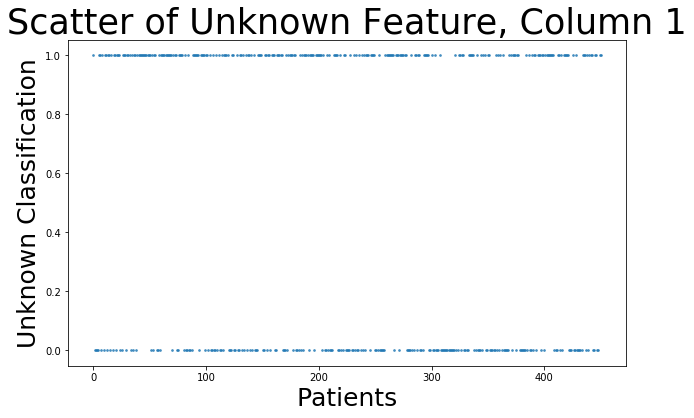

In [11]:
import numpy as np
x = np.arange(len(first_four[1]))
plt.figure(figsize=(10,6))
plt.scatter(x, first_four[1], s=3, alpha=0.7)
plt.xlabel('Patients', fontsize = '25')
plt.ylabel('Unknown Classification', fontsize = '25')
plt.title('Scatter of Unknown Feature, Column 1', fontsize='35')
plt.show()

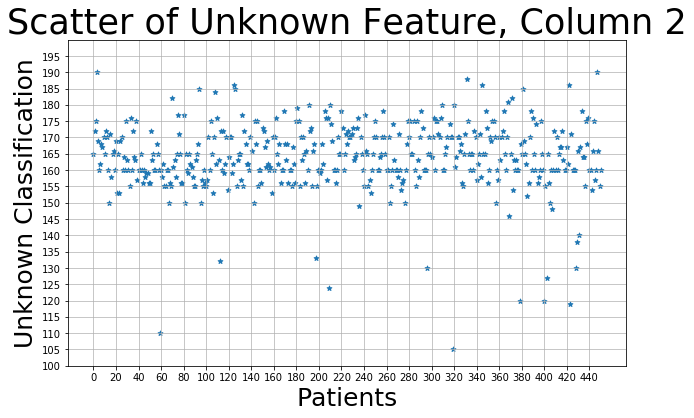

In [14]:
import numpy as np
x = np.arange(len(first_four[2]))
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.grid(linestyle='-', linewidth=0.7)
plt.scatter(x, first_four[2], s=25, alpha=1, marker='*')
plt.xlabel('Patients', fontsize = '25')
plt.ylim([100,200])
plt.yticks(np.arange(100, 200, 5.0))
plt.xticks(np.arange(0, 451, 20.0))
plt.ylabel('Unknown Classification', fontsize = '25')
plt.title('Scatter of Unknown Feature, Column 2', fontsize='35')
plt.show()

<function matplotlib.pyplot.show>

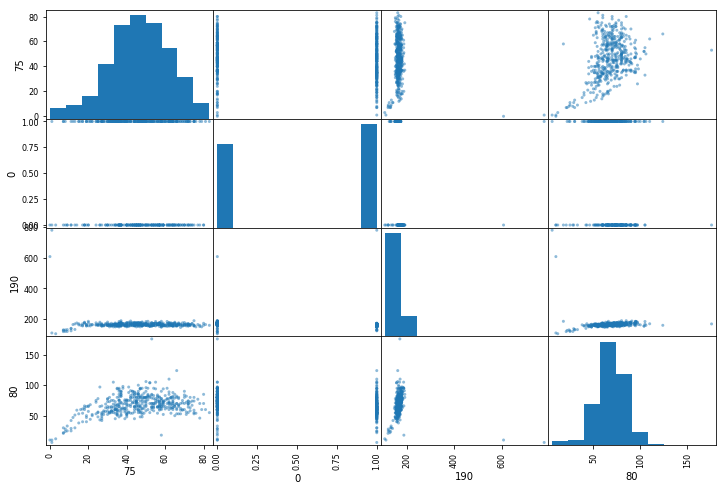

In [15]:
from pandas.plotting import scatter_matrix
columns = 4
scatter_matrix(patient_data.iloc[:,:4], figsize=(12,8))
plt.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc42d1d8940>,
      dtype=object)

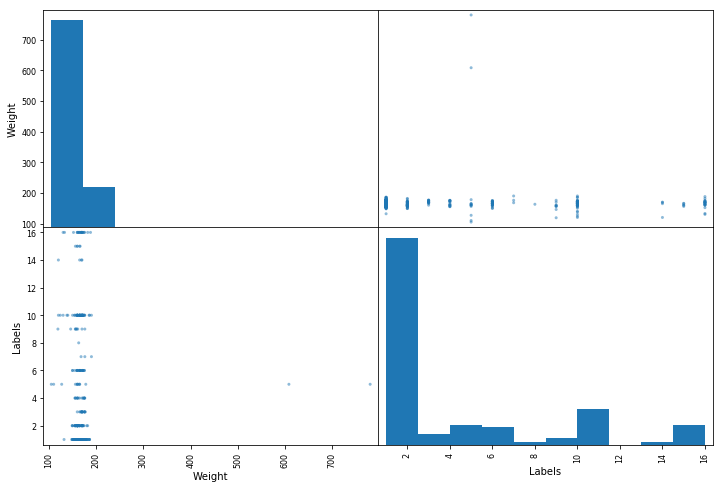

In [16]:
df = pd.concat([patient_data['190'], patient_data['8']], axis=1, keys=['Weight', 'Labels'])
scatter_matrix(df, figsize=(12,8))

## Part 2 Conclusion
In the end, we conclude the columns are as follows:
0. Age
<p>Since the data in column zero goes from to just past 80, we felt that age was a good guess for the data in this column. There were no outliers (nobody that is 200 years old), no negative values, and what looks like something close to a normal distribution of data. </p>
1. Gender
<p>This guess is mostly based on the binary nature of the data, and the fact that it is pretty evenly distributed between 0 and 1. We could not think of another important evenly distributed binary data point.</p>
2. Height in centimeters
<p>This column took a little bit longer to figure out, we had to plot it in a few different ways, before finally realizing what it might be. The clue was realizing, what do most people have that is between 160 and 180? Our first thought was weight in lbs., but we realized this wasn't quite right. Thinking that data may be metric, and that may be why we don't recognize it, a quick check of 160 cm -> feet and 180 cm -> feet confirmed our suspicions.</p>
3. Income
<p>The only good reasoning on this is just looking at data for average salaries. Most people make between 40-80 thousand per year, with the average in Austin specifically being around $55,000.</p>

## Part 3
We calculate the mean of each column, and pass it to the pandas command to fill NaN values.

In [20]:
patient_data.fillna(patient_data.mean())
#assert(patient_data.isnull().values.any() == False), "Try again"
if patient_data.isnull().values.any() == False:
    print("Success!")
else:
    print("Failure!")

Success!


## Part 4
There are various ways to map the data to the classification given. Investigating the columns with higher correlation to the outcomes could help pinpoint features that have more influence. For example, there are built in methods that can produce a matrix showing correlations between the columns. Checking which columns have greater (absolute value) correlations with the label column would help show the features that more strongly influence the labels.

A classifier such as naive bayes would likely work. Essentially you are looking for a mapping from relevant features to labels.

## Extra
Various calls that we used to try to look at the data at different points

In [21]:
patient_data.describe()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.407982,0.552106,166.135255,68.144124,88.915743,155.068736,367.199557,169.940133,89.935698,33.787140,...,-0.279601,9.048115,-1.458537,0.003991,0.0,0.513969,1.218625,19.317295,29.429047,3.871397
std,16.429846,0.497830,37.194646,16.599841,15.381143,44.856534,33.422017,35.672130,25.813912,45.421423,...,0.549328,3.476718,2.004481,0.050173,0.0,0.347441,1.425438,13.517617,18.490566,4.407706
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,4.000000,...,-0.450000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.400000,17.500000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.850000,41.050000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [22]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 280 entries, 75 to 8
dtypes: float64(120), int64(155), object(5)
memory usage: 986.6+ KB


In [17]:
patient_data.head()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
